# <Center>  BLACK FRIDAY SALES PREDICTION

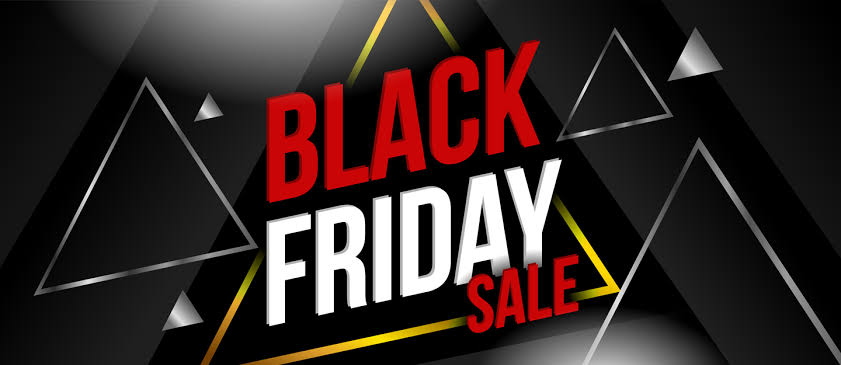

### IMPORTING LIBRARIES 

In [1]:
# loading the library

import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

### LOADING DATASET 

In [2]:
train=pd.read_csv(r"C:\Users\Dell\Downloads\Black_friday Dataset\train.csv")
test=pd.read_csv(r"C:\Users\Dell\Downloads\Black_friday Dataset\test.csv")

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
<class 'pandas

###### From the train and test data we can observe that 2 attribute of float,4 Numerical attribute,5 Categorical attribute present,train total consists of 5,50,068 records with 12 attributes,test cocnsists of 2,33,599 records with 11 attributes.We can observe in both train and test there is a missing values in product category 2,3.

In [6]:
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [7]:
#checking unique values in train dataset
unique_val = train.apply(lambda x: len(x.unique()))
unique_val

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [8]:
#checking unique values in test dataset
unique_val2 = test.apply(lambda x: len(x.unique()))
unique_val2

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              18
Product_Category_3              16
dtype: int64

### Exploratory data analysis

In [9]:
print(train.isnull().sum())
print(test.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


##### In both train and test data null values present in Product Category 2 and Product Category 3

In [10]:
print(train[train.duplicated()])
print(test[test.duplicated()])

Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase]
Index: []
Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3]
Index: []


In [11]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


##### There's no duplicated values present in the dataset

<Axes: xlabel='Purchase', ylabel='Density'>

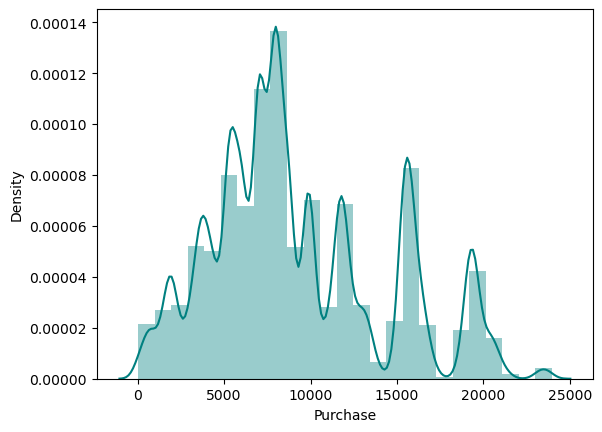

In [12]:
#First we explore with single attirbutes [UNIVARIENT ANALYSIS]
sns.distplot(train["Purchase"],bins=25,color='teal')

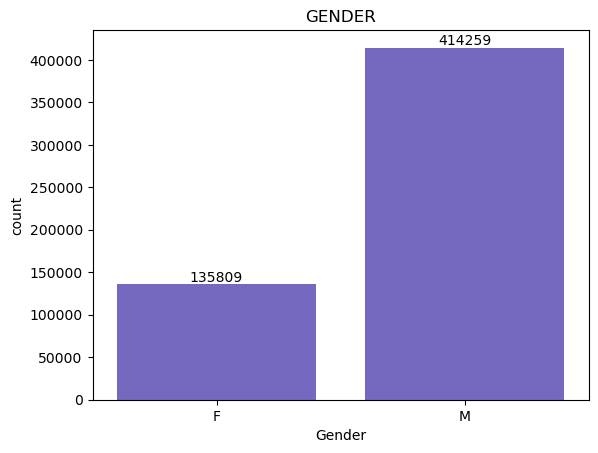

In [13]:
a=sns.countplot(x='Gender',data=train,color='slateblue')
a.set_title('GENDER')
for label in a.containers:
    a.bar_label(label)
plt.show()

###### On an average Male gender spends more money on purchase than female

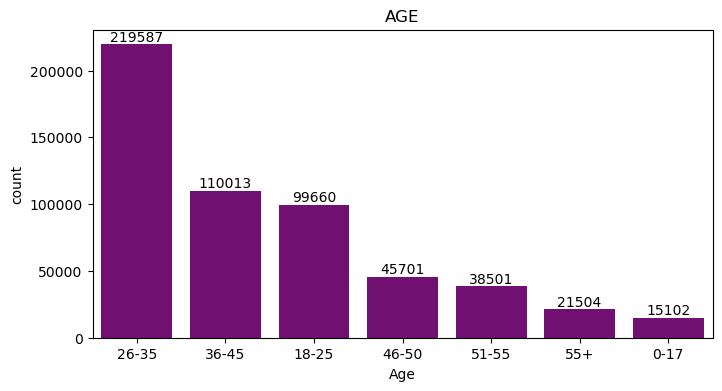

In [14]:
plt.figure(figsize=(8,4))
b=sns.countplot(x='Age',data=train,color='Purple',order=train['Age'].value_counts(ascending=False).index)
b.set_title('AGE')
for label in b.containers:
    b.bar_label(label)

###### Age around 26-35 and 36-45 are more likely on purchase

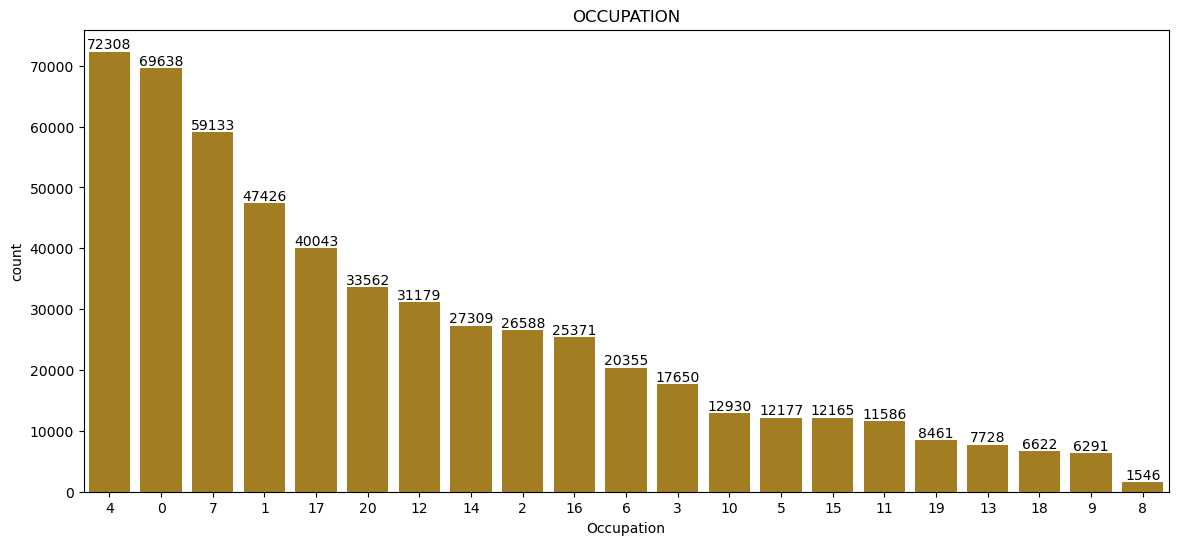

In [15]:
plt.figure(figsize=(14,6))
c=sns.countplot(x='Occupation',data=train,color='darkgoldenrod',order=train['Occupation'].value_counts(ascending=False).index)
c.set_title('OCCUPATION')
for label in c.containers:
    c.bar_label(label)

###### Occupation with 4,0,7 are buying more products on sales than the people with other occupation

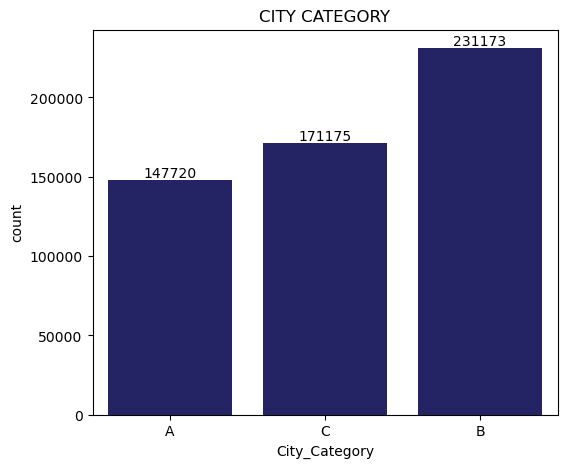

In [16]:
plt.figure(figsize=(6,5))
d=sns.countplot(x='City_Category',data=train,color='midnightblue',order=train['City_Category'].value_counts(ascending=True).index)
d.set_title('CITY CATEGORY')
for label in d.containers:
    d.bar_label(label)

###### We can obeserve that City type "B" are buying more products than other two cities

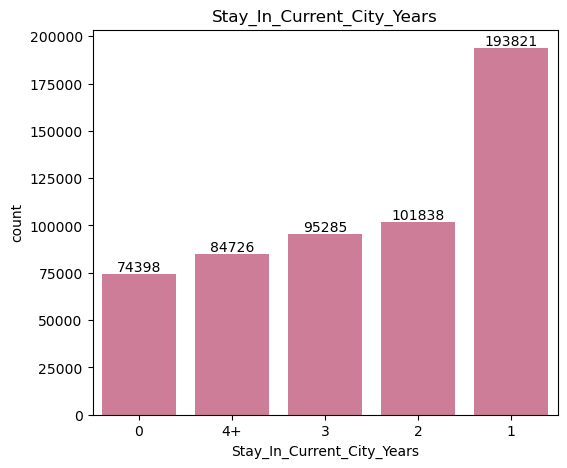

In [17]:
plt.figure(figsize=(6,5))
e=sns.countplot(x='Stay_In_Current_City_Years',data=train,color='palevioletred',order=train['Stay_In_Current_City_Years'].value_counts(ascending=True).index)
e.set_title('Stay_In_Current_City_Years')
for label in e.containers:
    e.bar_label(label)

###### People staying for 1 year are spending more on purchase

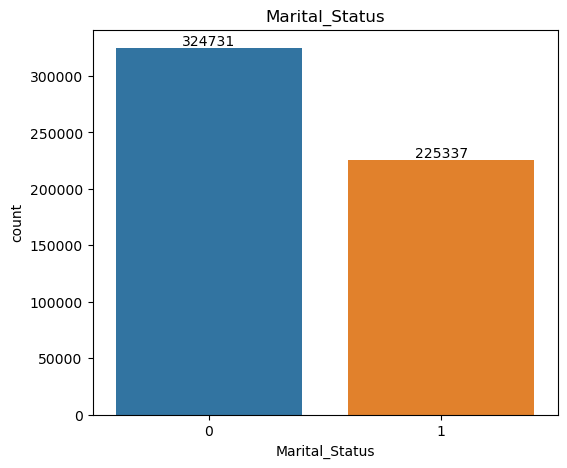

In [18]:
plt.figure(figsize=(6,5))
f=sns.countplot(x='Marital_Status',data=train)
f.set_title('Marital_Status')
for label in f.containers:
    f.bar_label(label)

###### 0= Unmarried  1= married  ,More Unmarried people have purchased the item

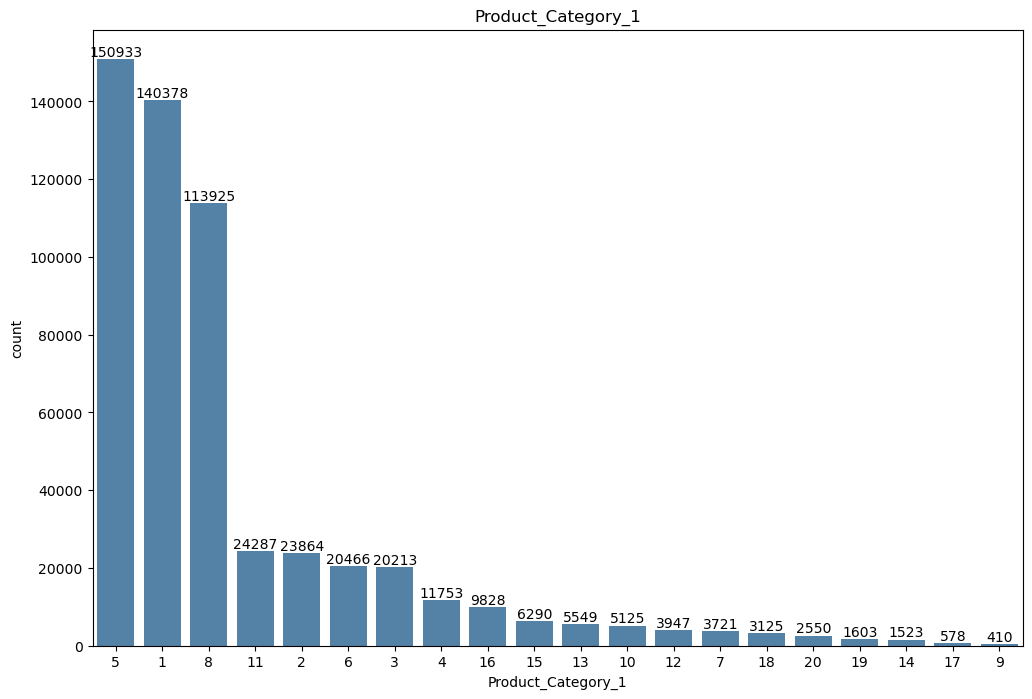

In [19]:
plt.figure(figsize=(12,8))
g=sns.countplot(x='Product_Category_1',data=train,color='steelblue',order=train['Product_Category_1'].value_counts(ascending=False).index)
g.set_title('Product_Category_1')
for label in g.containers:
    g.bar_label(label)

###### we can observe that product 1,5,8 represents more number of buying products

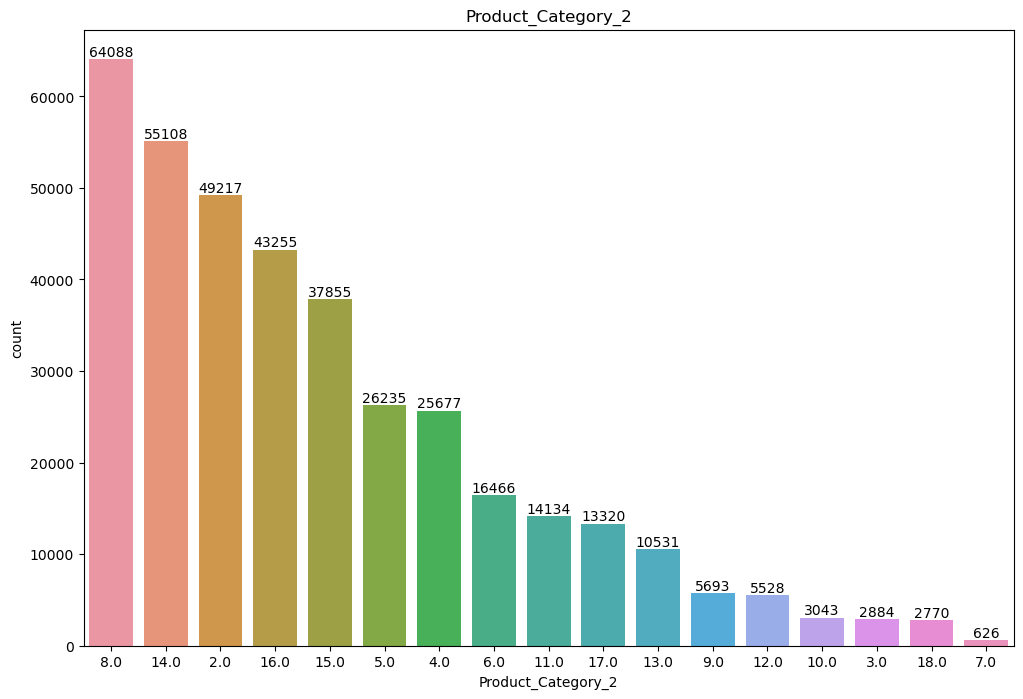

In [20]:
plt.figure(figsize=(12,8))
h=sns.countplot(x='Product_Category_2',data=train,order=train['Product_Category_2'].value_counts(ascending=False).index)
h.set_title('Product_Category_2')
for label in h.containers:
    h.bar_label(label)

###### we can observe that 8,14,2,16,15 are more buying product in category 2

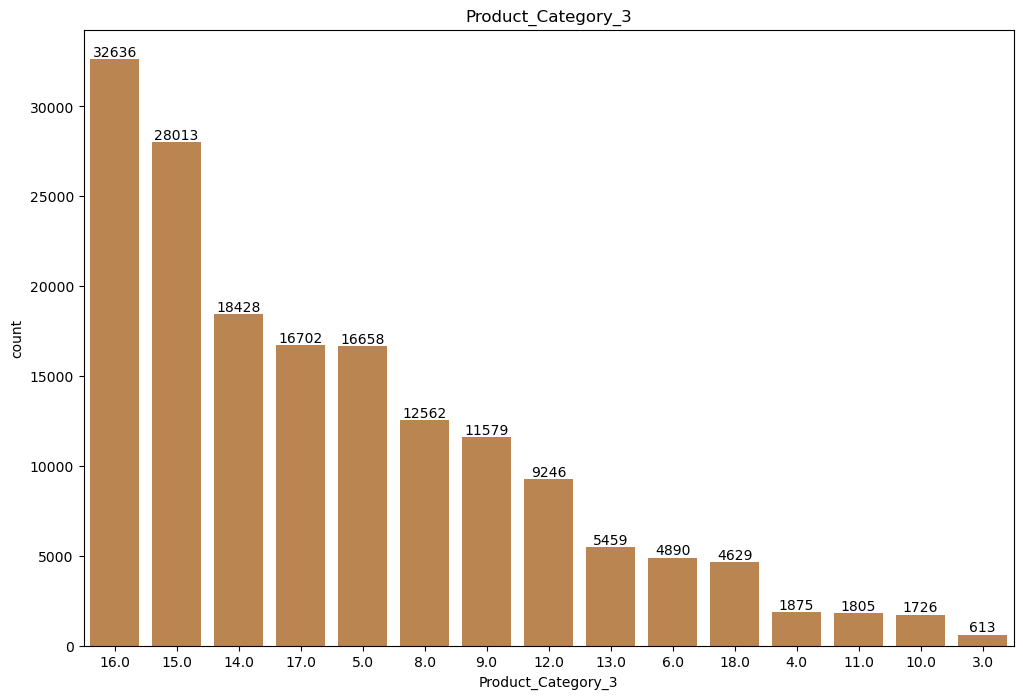

In [21]:
plt.figure(figsize=(12,8))
i=sns.countplot(x='Product_Category_3',data=train,order=train['Product_Category_3'].value_counts(ascending=False).index,color='peru')
i.set_title('Product_Category_3')
for label in i.containers:
    i.bar_label(label)

###### we can observe that 16,15 are buying more product from category 3

#### Different plot analysis with target variable [BIVARIENT ANALYSIS]

In [22]:
#let's bifurgate categorical,numerical,float dtypes

cat = train.select_dtypes(['object']).columns
num = train.select_dtypes(['int']).columns
flt = train.select_dtypes(['float']).columns
print(cat)
print(num)
print(flt)

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')
Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')
Index(['Product_Category_2', 'Product_Category_3'], dtype='object')


In [23]:
train.groupby('Occupation')['Purchase'].mean()*100

Occupation
0     912442.858784
1     895319.326951
2     895248.168347
3     917859.308782
4     921398.025115
5     933314.929786
6     925653.569148
7     942572.822282
8     953259.249677
9     863774.376093
10    895935.537510
11    921384.584844
12    979664.023862
13    930635.106108
14    950070.277198
15    977889.116317
16    939446.434906
17    982147.823590
18    916965.584416
19    871062.723082
20    883649.490495
Name: Purchase, dtype: float64

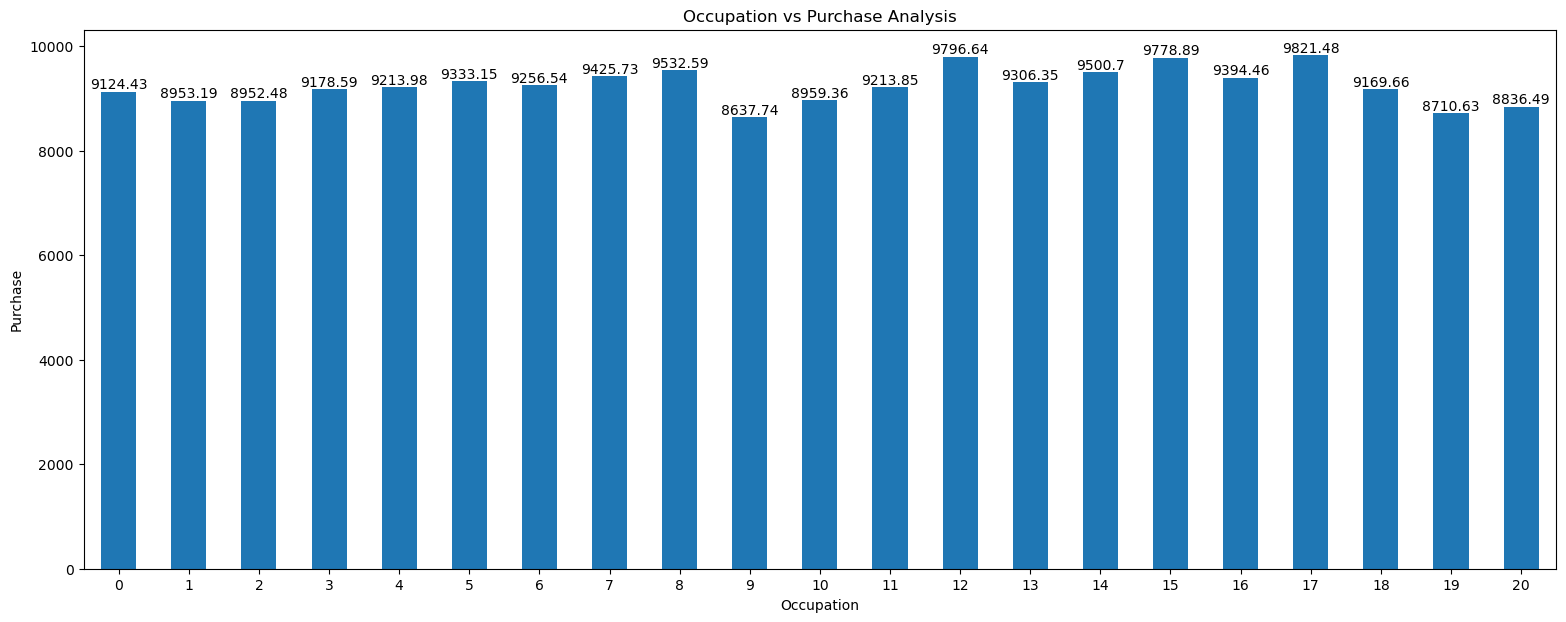

In [24]:
aa=train.groupby('Occupation')['Purchase'].mean().plot(kind='bar',figsize=(19,7))
for label in aa.containers:
    aa.bar_label(label)
plt.xticks(rotation=0)
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title("Occupation vs Purchase Analysis")
plt.show()

###### In the above figure the amount each user spends on average is more or less the same for all occupation

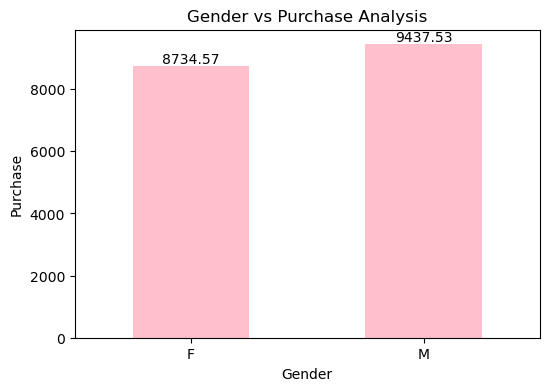

In [25]:
bb=train.groupby('Gender')['Purchase'].mean().plot(kind='bar',figsize=(6,4),color='pink')
for label in bb.containers:
    bb.bar_label(label)
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.title("Gender vs Purchase Analysis")
plt.show()

###### Male gender spends more money on purchase than the female gender

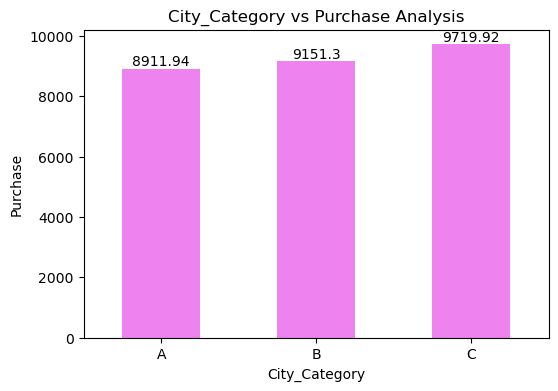

In [26]:
dd=train.groupby('City_Category')['Purchase'].mean().plot(kind='bar',figsize=(6,4),color='violet')
for label in dd.containers:
    dd.bar_label(label)
plt.xticks(rotation=0)
plt.xlabel('City_Category')
plt.ylabel('Purchase')
plt.title("City_Category vs Purchase Analysis")
plt.show()

###### We can observe that city type B had the highest number of purchase registered.However, the city whose buyers spend the most is City type C

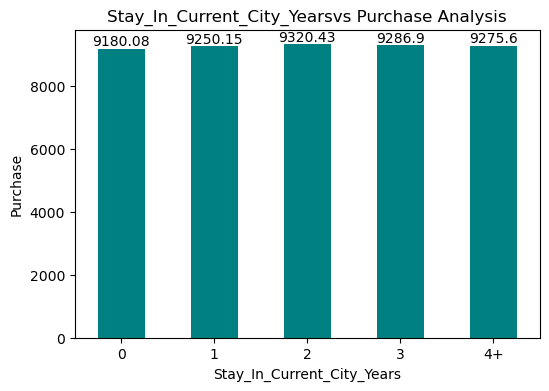

In [27]:
cc=train.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind='bar',figsize=(6,4),color='teal')
for label in cc.containers:
    cc.bar_label(label)
plt.xticks(rotation=0)
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Purchase')
plt.title("Stay_In_Current_City_Yearsvs Purchase Analysis")
plt.show()

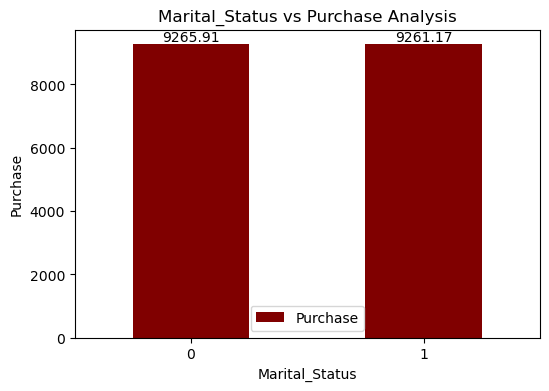

In [28]:
ee=train.groupby('Marital_Status')['Purchase'].mean().plot(kind='bar',figsize=(6,4),color='maroon')
for label in ee.containers:
    ee.bar_label(label)
plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Marital_Status')
plt.ylabel('Purchase')
plt.title("Marital_Status vs Purchase Analysis")
plt.show()

###### As we observed before unmarried person purchased more than married.however,on an average an individual customer tends to spend the same amount independently if he/she is married or not

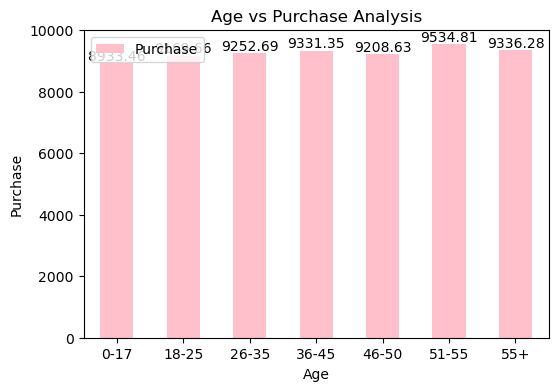

In [29]:
gg=train.groupby('Age')['Purchase'].mean().plot(kind='bar',figsize=(6,4),color='pink')
for label in gg.containers:
    gg.bar_label(label)
plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title("Age vs Purchase Analysis")
plt.show()

###### On an average all the age spend similar on purchase except 0-17

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


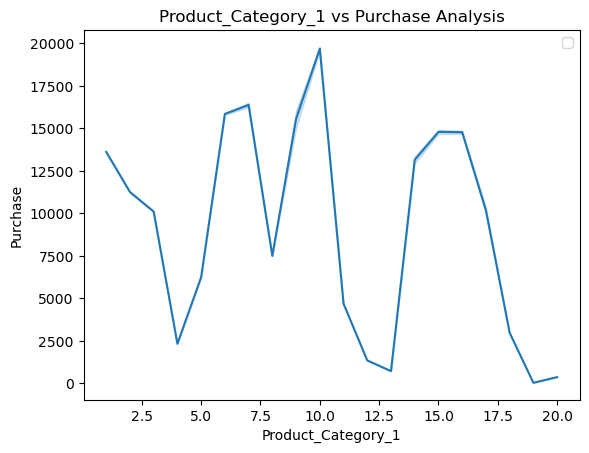

In [30]:
ff=sns.lineplot(x='Product_Category_1',y='Purchase',data=train)
plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase')
plt.title("Product_Category_1 vs Purchase Analysis")
plt.show()

In [31]:
miss_values=train.isnull().sum()
miss_values[miss_values>0]

Product_Category_2    173638
Product_Category_3    383247
dtype: int64

In [32]:
train[['Product_Category_2','Product_Category_3']] = train[['Product_Category_2','Product_Category_3']].fillna(train[['Product_Category_2','Product_Category_3']].median())

In [33]:
test[['Product_Category_2','Product_Category_3']] = test[['Product_Category_2','Product_Category_3']].fillna(test[['Product_Category_2','Product_Category_3']].median())

In [34]:
train.isnull().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [35]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

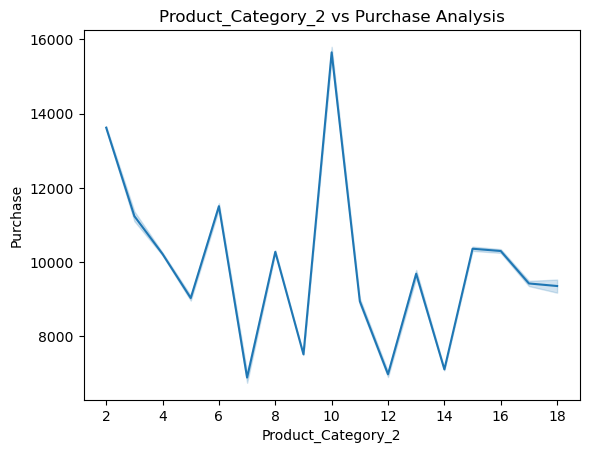

In [36]:
sns.lineplot(x='Product_Category_2',y='Purchase',data=train)
plt.xticks(rotation=0)
plt.xlabel('Product_Category_2')
plt.ylabel('Purchase')
plt.title("Product_Category_2 vs Purchase Analysis")
plt.show()

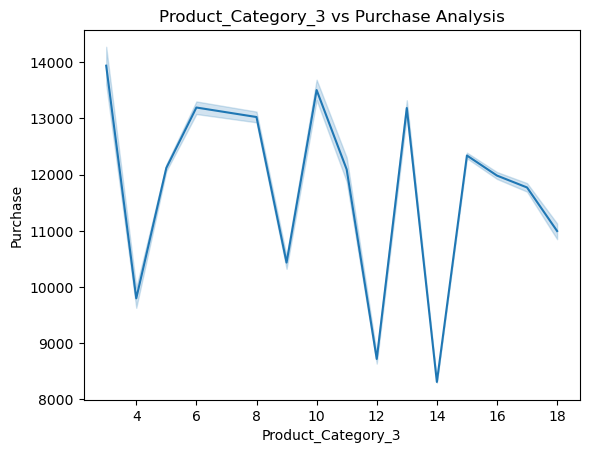

In [37]:
sns.lineplot(x='Product_Category_3',y='Purchase',data=train)
plt.xticks(rotation=0)
plt.xlabel('Product_Category_3')
plt.ylabel('Purchase')
plt.title("Product_Category_3 vs Purchase Analysis")
plt.show()

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

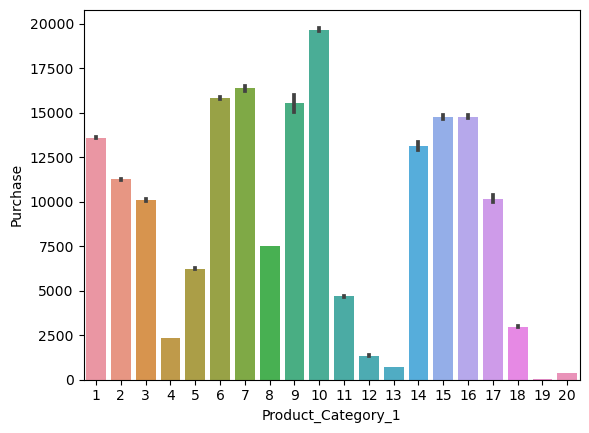

In [38]:
sns.barplot(x='Product_Category_1',y='Purchase',data=train)

###### Previously average amount spent on 1,5,8 were more on these product,as we analyse with purchase other categories appearing with high purchase values despite having low impact on sales

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

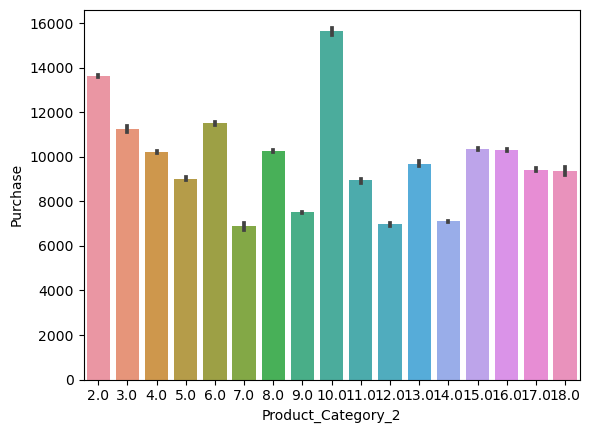

In [39]:
sns.barplot(x='Product_Category_2',y='Purchase',data=train)

###### Product category 2 are more selling product 

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

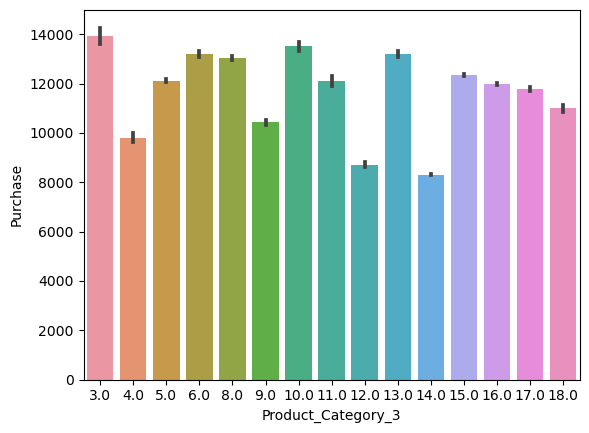

In [40]:
sns.barplot(x='Product_Category_3',y='Purchase',data=train)

##### Making target attribute to Normal distribution usinf squareroot

<Axes: xlabel='Purchase', ylabel='Density'>

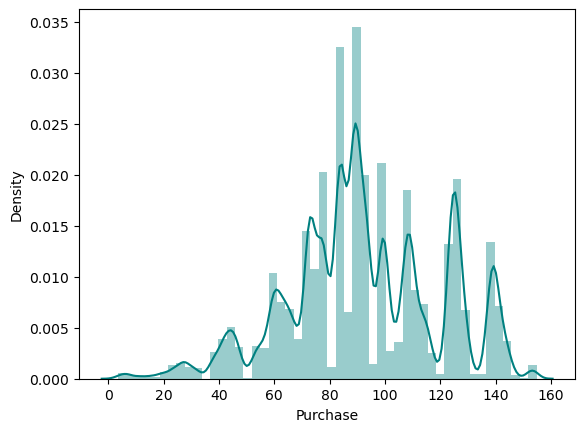

In [41]:
sns.distplot(np.sqrt(train['Purchase']),color='teal')

###### Label encoding for categorical values to convert to numerical values

<Axes: xlabel='Purchase'>

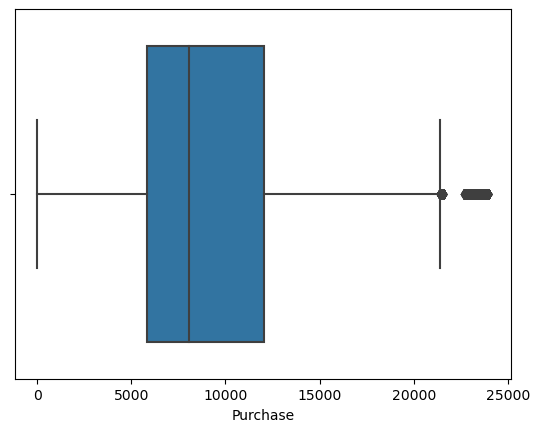

In [44]:
sns.boxplot(x='Purchase',data=train)

##### From the box plot we can conclude that values above 20000 are all outliers. Hence we have to remove these outliers. From the displot and statistical analysis done before we know that the Mean value of purchase is 9263 and Standard deviation(SD) is 5023. We know that we need to eliminate all value above 21000 since they are outliers(derived from Boxplot). 

In [45]:
from scipy import stats
z= np.abs(stats.zscore(train['Purchase']))

threshold =2.33
np.where (z>2.33)
train = train[(z<2.33)]

<Axes: >

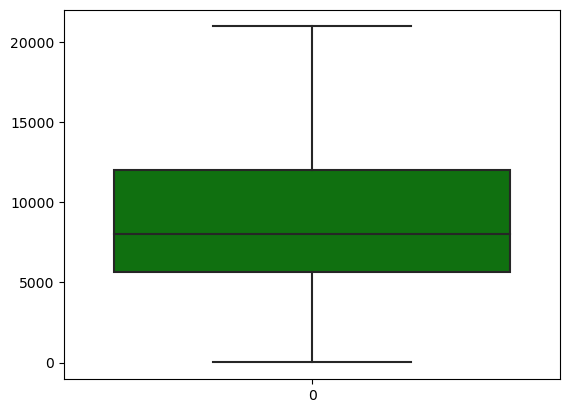

In [48]:
sns.boxplot(train['Purchase'],color='green')

In [49]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
train['Gender']= label_encoder.fit_transform(train['Gender']) 
train['Age']= label_encoder.fit_transform(train['Age'])
train['City_Category']= label_encoder.fit_transform(train['City_Category'])
train['Stay_In_Current_City_Years']= label_encoder.fit_transform(train['Stay_In_Current_City_Years'])

In [50]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
test['Gender']= label_encoder.fit_transform(test['Gender']) 
test['Age']= label_encoder.fit_transform(test['Age'])
test['City_Category']= label_encoder.fit_transform(test['City_Category'])

In [51]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [52]:
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [53]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,14.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,14.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,14.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,14.0,7969


<Axes: >

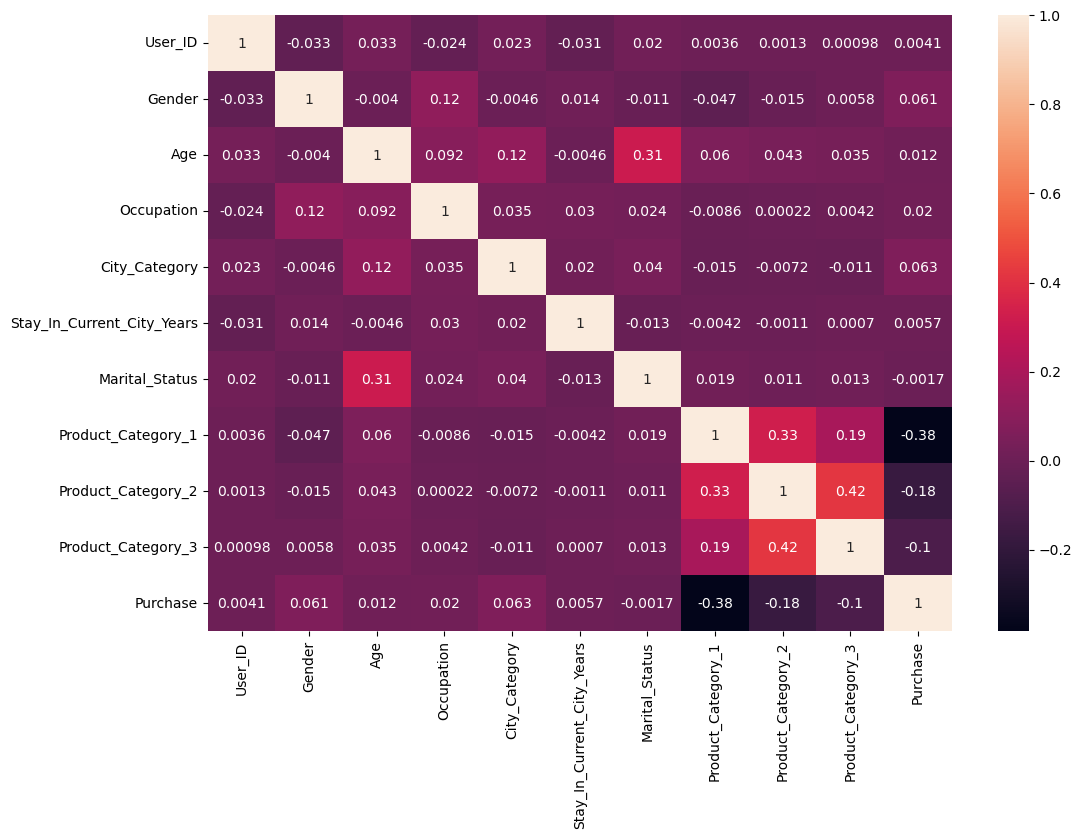

In [54]:
plt.subplots(figsize=(12,8))
sns.heatmap(train[train.describe().columns].corr(),annot=True)

##### Let's check the module with Ordinary least Square (OLS)

In [55]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [56]:
model_1 = smf.ols(formula='Purchase ~  Gender + Age + Occupation + City_Category + Stay_In_Current_City_Years + Marital_Status  + Product_Category_1 + Product_Category_2 + Product_Category_3 ',data = train,random_state=1).fit()
print(model_1.summary())

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)


                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:42:08   Log-Likelihood:            -5.3737e+06
No. Observations:              546402   AIC:                         1.075e+07
Df Residuals:                  546392   BIC:                         1.075e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [57]:
X=train.drop(columns=['User_ID','Product_ID','Purchase'],axis=1)
y=train['Purchase']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [59]:
print(f'X_train shape is {X_train.shape}\n y train shape is {y_train.shape}')

X_train shape is (437121, 9)
 y train shape is (437121,)


In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [61]:
train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.15476123873223913


In [62]:
y_pred_train = lr.predict(X_train)      
y_pred_test = lr.predict(X_test)  

In [63]:
y_train[0]

8370

In [64]:
y_pred_train[0]

9245.149796442032

In [65]:
lr.intercept_

11437.169306949409

In [66]:
lr.coef_

array([ 481.75450645,  113.39092492,    5.07327226,  348.99248299,
         12.38649128,  -55.34223502, -451.51597795,  -66.18340143,
        -19.07092771])

In [67]:
from sklearn.metrics import r2_score

train_score = r2_score(y_train,y_pred_train)
test_score = r2_score(y_test,y_pred_test)

print(f'Training Accuracy = {train_score}\nTesting Accuracy = {test_score}')

Training Accuracy = 0.15476123873223913
Testing Accuracy = 0.16000095180194185


In [68]:
score = r2_score(y_test,y_pred)
print('R2 Score =',score)

R2 Score = 0.16000095180194185


In [69]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-square =',score)

Mean Absolute Error = 3466.919984529867
Mean Squared Error = 20375435.785274178
Root Mean Squared Error = 4513.915792886945
R-square = 0.16000095180194185


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [71]:
dt= DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

In [72]:
r2_score(y_test, dt_y_pred)

0.5542877616854799

In [73]:
print("RMSE of Decision Tree Model on test data is ",np.sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Decision Tree Model on test data is  3288.072126717531


In [74]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-square =',score)

Mean Absolute Error = 2201.273721651545
Mean Squared Error = 9128893.9086922
Root Mean Squared Error = 3021.4059490065547
R-square = 0.16000095180194185


#### scaling the data using Standard Scalar

In [75]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [76]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [77]:
for i in range(3):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train_scaled)
    y_pred_test=models[i].predict(X_test_scaled)
    
    print('MSE_train: ',mean_squared_error(y_train,y_pred_train))
    print('MSE_test: ',mean_squared_error(y_test,y_pred_test))
    
    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    
    print('R2_score_train: ',r2_score(y_train,y_pred_train))
    print('R2_score_test: ',r2_score(y_test,y_pred_test))
    
    print()
    print('--'*55)

LinearRegression(): 
MSE_train:  20418872.13840312
MSE_test:  20375435.785274178
RMSE_train:  4518.724614136507
RMSE_test:  4513.915792886945
R2_score_train:  0.15476123873223913
R2_score_test:  0.16000095180194185

--------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(): 
MSE_train:  5073518.989177545
MSE_test:  10807969.75668608
RMSE_train:  2252.4473332749744
RMSE_test:  3287.547681279479
R2_score_train:  0.7899817934793991
R2_score_test:  0.5544299319904071

--------------------------------------------------------------------------------------------------------------
RandomForestRegressor(): 
MSE_train:  5325296.865371887
MSE_test:  9125781.785627179
RMSE_train:  2307.660474457169
RMSE_test:  3020.890892704862
R2_score_train:  0.7795594538542401
R2_score_test:  0.6237799232971422

--------------------------------------------------------------------------------------------------------------


##### Least the RMSE score better the Accuracy for model,So Random Forest Regressor is giving the lowest RMSE value we consider this for hypertuning and predicting the price.

###### We choose the Random forest regression as a better result to analyse further with the hyperparameter tuning -GridsearchCV,RandomisedSearchCV.

##### Hyperparameter tuning using RandomizedSearchCV

In [78]:
# Number of trees in random Forest
n_estimators = [100,200,300]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# The depth of the tree max_depth
max_depth = [5,10]
# Min samples required to split the node
min_sample_split = [2,5,15]
# Min no of samples required to each leaf to split                        ---- Pruning
min_samples_leaf = [1,2,5]

In [79]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [80]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator =RandomForestRegressor(),param_distributions = random_grid,cv=4,random_state = 0)

In [81]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 15],
                                        'n_estimators': [100, 200, 300]},
                   random_state=0)

In [82]:
best_params = rf_model.best_params_
print(best_params)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 10}


In [85]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=5, max_features='auto', max_depth=10)

In [86]:
model1.fit(X_train,y_train)
# Predicting for training and testing 
ytrain_pred = model1.predict(X_train)
ytest_pred = model1.predict(X_test)


In [87]:
train_score = model1.score(X_train,y_train)
test_score = model1.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.65, Testing Score 0.65


In [88]:
    print('MSE_train: ',mean_squared_error(y_train,ytrain_pred))
    print('MSE_test: ',mean_squared_error(y_test,ytest_pred))
    
    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,ytrain_pred)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,ytest_pred)))
    
    print('R2_score_train: ',r2_score(y_train,ytrain_pred))
    print('R2_score_test: ',r2_score(y_test,ytest_pred))
    

MSE_train:  8373036.749156739
MSE_test:  8463888.891404228
RMSE_train:  2893.620007733693
RMSE_test:  2909.276351844944
R2_score_train:  0.6533983286669347
R2_score_test:  0.6510671630409008


In [89]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Instantiate XGBoost Regressor
model2 = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, objective='reg:squarederror')

# Fit the model on the training data
model2.fit(X_train, y_train)

# Calculate predictions for both training and testing sets
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

# Calculate scores
train_score = model2.score(X_train, y_train)
test_score = model2.score(X_test, y_test)

# Calculate MSE for both training and testing sets
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

# Calculate RMSE for both training and testing sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

# Calculate R2 score for both training and testing sets
R2_score_train = r2_score(y_train, y_pred_train)
R2_score_test = r2_score(y_test, y_pred_test)

# Print the results
print('Training Score:', round(train_score, 2))
print('Testing Score:', round(test_score, 2))

print('MSE_train:', MSE_train)
print('MSE_test:', MSE_test)

print('RMSE_train:', RMSE_train)
print('RMSE_test:', RMSE_test)

print('R2_score_train:', R2_score_train)
print('R2_score_test:', R2_score_test)

Training Score: 0.69
Testing Score: 0.67
MSE_train: 7386240.158331956
MSE_test: 8019844.870911229
RMSE_train: 2717.7638157742767
RMSE_test: 2831.933062576026
R2_score_train: 0.6942467517531091
R2_score_test: 0.6693733508693709


### We can say that XGBoost model is performing best in comparison to other regressor models. Low RMSE value and high r2 score is achieved by XGBoost Regressor model.                                                                                                  RMSE : 2831.9                                                                                                                                                                            r2 score : 0.66